# Machine Learning Project
### Team Name:Internship 1 - Group 5 - Task 5
<h3>Malak Ahmed Saber</h3>


In [84]:
import pandas as pd 
import numpy as np 

In [86]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [88]:
from sklearn.model_selection import train_test_split

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [94]:
from sklearn.model_selection import GridSearchCV

In [96]:
df = pd.read_csv('../Week (4)/final_internship_data.csv')

In [97]:
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [98]:
df.shape

(500000, 26)

In [102]:
df.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [106]:
df.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [108]:
for col in df.columns:
    if (df[col].isnull().sum() > 0):
        df[col].fillna(df[col].median(), inplace=True)

C:\Users\Malak\AppData\Local\Temp\ipykernel_62548\734041144.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [110]:
df.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             0
nyc_dist             0
distance             0
bearing              0
dtype: int64

In [112]:
df.duplicated().sum()

0

In [114]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,11.358361,-1.265712,0.696740,-1.265756,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.275940,380.500200,363.840330,363.670585,355.987968,19.468602,0.297141
std,9.916617,0.206941,0.140909,0.205902,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.075630,2428.792842,2425.064022,2428.336786,2428.718941,367.297769,1.804540
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341545,32.173718,17.100776,14.887002,7.147434,1.214561,-0.854710
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785642,38.304440,22.214777,22.417794,14.448641,3.890026,2.206761
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


<Axes: ylabel='fare_amount'>

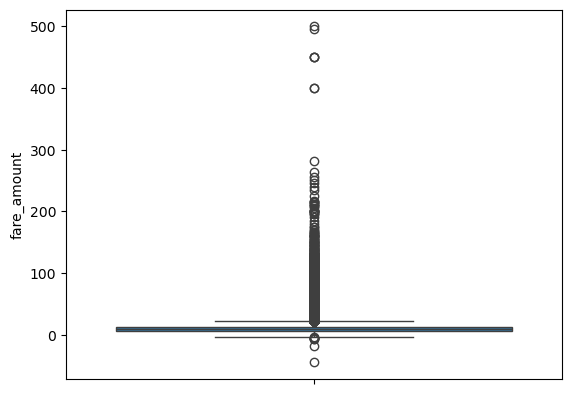

In [116]:
sns.boxplot(df['fare_amount'])

<Axes: ylabel='pickup_latitude'>

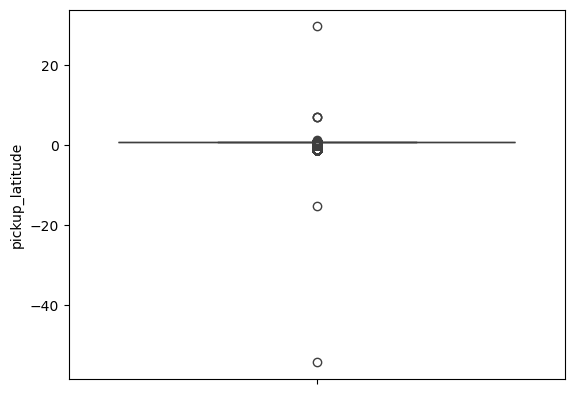

In [118]:
sns.boxplot(df['pickup_latitude'])

In [120]:
for col in df.select_dtypes(include='number').columns:
    mean = df[col].mean()
    stddev = df[col].std()
    df = df[(df[col] >= mean - 3 * stddev) & (df[col] <= mean + 3 * stddev)]

## Feature Engineering

In [123]:
df.select_dtypes(include='O').columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'pickup_datetime'],
      dtype='object')

In [125]:
df = df.drop(columns=['User ID', 'User Name', 'key', 'pickup_datetime'])

In [127]:
df['Driver Name'].value_counts()

Driver Name
Michael Smith       230
David Smith         168
Michael Johnson     167
James Smith         153
Michael Williams    144
                   ... 
Wanda Mckinney        1
Jonathan Fowler       1
Jeff Acevedo          1
Beth Pacheco          1
Lonnie Santana        1
Name: count, Length: 205904, dtype: int64

In [129]:
df['Car Condition'].value_counts()

Car Condition
Bad          111111
Very Good    111095
Excellent    111025
Good         111003
Name: count, dtype: int64

In [131]:
df['Weather'].value_counts()

Weather
sunny     89167
rainy     88901
cloudy    88856
stormy    88813
windy     88497
Name: count, dtype: int64

In [133]:
df['Traffic Condition'].value_counts()

Traffic Condition
Flow Traffic         148104
Congested Traffic    148091
Dense Traffic        148039
Name: count, dtype: int64

In [135]:
df['key'].value_counts()

KeyError: 'key'

In [136]:
df['pickup_datetime'].value_counts() # we already have day, weekday, year, month, hour to support time analysis

KeyError: 'pickup_datetime'

## Encoding

In [139]:
df.select_dtypes(include='O')

,Driver Name,Car Condition,Weather,Traffic Condition
1,Hannah Zimmerman,Excellent,cloudy,Flow Traffic
2,Amanda Jackson,Bad,stormy,Congested Traffic
3,Amy Horn,Very Good,stormy,Flow Traffic
4,Cassandra Larson,Bad,stormy,Congested Traffic
5,Wendy Bennett,Excellent,sunny,Congested Traffic
...,...,...,...,...
499994,Linda Davis,Very Good,windy,Congested Traffic
499995,Gabriel Coleman,Bad,rainy,Dense Traffic
499996,Larry Richards,Very Good,rainy,Flow Traffic
499997,Lonnie Santana,Bad,rainy,Flow Traffic


In [141]:
df['Car Condition'].value_counts()

Car Condition
Bad          111111
Very Good    111095
Excellent    111025
Good         111003
Name: count, dtype: int64

In [143]:
df['Car Condition'] = df['Car Condition'].replace({'Bad':0, 'Very Good':2, 'Excellent':3, 'Good':1})

C:\Users\Malak\AppData\Local\Temp\ipykernel_62548\299046975.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Car Condition'] = df['Car Condition'].replace({'Bad':0, 'Very Good':2, 'Excellent':3, 'Good':1})


In [145]:
df['Car Condition'].value_counts()

Car Condition
0    111111
2    111095
3    111025
1    111003
Name: count, dtype: int64

In [147]:
df['Weather'].value_counts()

Weather
sunny     89167
rainy     88901
cloudy    88856
stormy    88813
windy     88497
Name: count, dtype: int64

In [149]:
df['Weather'] = df['Weather'].replace({'sunny':4, 'rainy':3, 'cloudy':2, 'stormy':1, 'windy':0})

C:\Users\Malak\AppData\Local\Temp\ipykernel_62548\2403625915.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Weather'] = df['Weather'].replace({'sunny':4, 'rainy':3, 'cloudy':2, 'stormy':1, 'windy':0})


In [151]:
df['Traffic Condition'].value_counts()

Traffic Condition
Flow Traffic         148104
Congested Traffic    148091
Dense Traffic        148039
Name: count, dtype: int64

In [153]:
df['Traffic Condition'] = df['Traffic Condition'].replace({'Flow Traffic':0, 'Congested Traffic':1, 'Dense Traffic':2})

C:\Users\Malak\AppData\Local\Temp\ipykernel_62548\1977881650.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Traffic Condition'] = df['Traffic Condition'].replace({'Flow Traffic':0, 'Congested Traffic':1, 'Dense Traffic':2})


In [155]:
df['Driver Name'].value_counts().sum()

444234

### Encode Driver Name with Frequency encoding for ML

In [158]:
freq_encoding = df['Driver Name'].value_counts().to_dict()
df['Driver Name_encoded'] = df['Driver Name'].map(freq_encoding)

In [160]:
df = df.drop(columns=['Driver Name'])

## Train Test Split

In [163]:
df.columns

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing', 'Driver Name_encoded'],
      dtype='object')

In [165]:
x = df.drop('fare_amount', axis=1)
y= df['fare_amount']

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Modelling

### Random Forest

In [89]:
model = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    n_jobs=-1,
    random_state=42
)

In [91]:
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [93]:
y_pred = model.predict(x_test)

In [103]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Mean Absolute Error: 1.3364091111383798
Root Mean Squared Error: 1.9881012352762681
R² Score: 0.7484394288329079


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

In [ ]:
# Predictions
y_train_pred_ridge = ridge.predict(x_train)
y_test_pred_ridge = ridge.predict(x_test)

# --- TEST SET METRICS ---
mae_test = mean_absolute_error(y_test, y_test_pred_ridge)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
r2_test = r2_score(y_test, y_test_pred_ridge)

print("\n Test Set Evaluation:")
print(f"  MAE:  {mae_test}")
print(f"  RMSE: {rmse_test}")
print(f"  R²:   {r2_test}")

# --- TRAIN SET METRICS ---
mae_train = mean_absolute_error(y_train, y_train_pred_ridge)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
r2_train = r2_score(y_train, y_train_pred_ridge)

print(" Train Set Evaluation:")
print(f"  MAE:  {mae_train}")
print(f"  RMSE: {rmse_train}")
print(f"  R²:   {r2_train}")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(x_train, y_train)

In [ ]:
# Predictions
y_train_pred_dt = dt.predict(x_train)
y_test_pred_dt = dt.predict(x_test)

# --- TEST SET METRICS ---
mae_test = mean_absolute_error(y_test, y_test_pred_dt)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))
r2_test = r2_score(y_test, y_test_pred_dt)

print("\n Test Set Evaluation:")
print(f"  MAE:  {mae_test}")
print(f"  RMSE: {rmse_test}")
print(f"  R²:   {r2_test}")

# --- TRAIN SET METRICS ---
mae_train = mean_absolute_error(y_train, y_train_pred_dt)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
r2_train = r2_score(y_train, y_train_pred_dt)

print(" Train Set Evaluation:")
print(f"  MAE:  {mae_train}")
print(f"  RMSE: {rmse_train}")
print(f"  R²:   {r2_train}")

## Hyperparameter Tuning

In [1]:
'''param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}'''

In [169]:
param_grid = {
    'n_estimators': [50],
    'max_depth': [None]
}

In [171]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [89]:
'''grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                        # 3-fold cross-validation
    n_jobs=-1,                   # use all cores
    verbose=2,
    scoring='neg_root_mean_squared_error'  # or 'r2', 'neg_mean_absolute_error'
)'''

In [173]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=2,              
    n_jobs=-1,
    verbose=0,
    scoring='neg_root_mean_squared_error'
)

In [175]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1, param_grid={'max_depth': [None], 'n_estimators': [50]},
             scoring='neg_root_mean_squared_error')

### Trying randomized search for a better trade of between speed and performance

In [187]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

In [189]:
'''param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}'''

In [191]:
'''random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,       
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='neg_root_mean_squared_error'
)'''

## Best and Evaluation

In [178]:
best_rf = grid_search.best_estimator_

In [182]:
y_pred_best = best_rf.predict(x_test)

In [184]:
mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print("Best Parameters:", grid_search.best_params_)
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

Best Parameters: {'max_depth': None, 'n_estimators': 50}
MAE: 1.3860594257543868
RMSE: 2.2460024690867217
R² Score: 0.8250915832353248


Final Hyperparameter Grid Search and Evaluation

In [ ]:
param_grid = {
    'n_estimators': [30, 50, 70],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=2, n_jobs=-1, verbose=1)

In [ ]:
X_small = x_train[:2000]
y_small = y_train[:2000]

grid_search.fit(X_small, y_small)

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
x_small_test = x_test[:1000]
y_pred = best_model.predict(x_small_test)

In [ ]:
y_small_test = y_test[:1000]

mae = mean_absolute_error(y_small_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_small_test, y_pred))
r2 = r2_score(y_small_test, y_pred)

print(" Best Parameters:", grid_search.best_params_)
print("MAE:", mae)
print(f" RMSE: {rmse}")
print(f" R² Score: {r2}")